# SN2XY
### Reverse curvalinear Coordinate Transformation
Translates data points that are in a known stream-normal coordinate\ 
system (eg. a known centerline processed with `xy2sn`) back into\
cartesian XY coordinates to match the original data you processed with xy2sn.

This imporementation is different then the methods used in Legleiter and Kyriakidis (2006). This method uses the angles between centerline points calculated in `xy2sn` to calculate a coordinate rotation from Stream Normal to XY. This is more accurate that the 'Finite Difference' methods in the paper.

`xy_out = sn2xy(ds, xs, cl, finite=False)`
    
Parameters
----------
**ds** : array (n X 1), Downstream coordinates of the input data.\
**xs** : array (n X 1), Crossstream coordinates of the input data.\
**cl** : dataframe, Centerline output form xy2sn (Columns = X, Y, DS, phi)\

optional:\
**finite** : boolean, True - returns Finite Difference coorindates (from original Leg. & Kyr. implementation), False (default)\
**verbose** : boolean, deflaut = True, prints feedback - False = quiet

Returns
-------
xy_out : dataframe with transformed coordinates, same order as inputs


### Workflow
1. Run `xy2sn` - output *sn* and *clOut*
2. Perform analysis on `sn` data
3. Run `sn2xy` to get data back into XY coords

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# add stream normal folder to sys path
sys.path.append('D:/Dropbox/Python/streamNormal/')

# Import stream normal functions
import streamNormal as strNorm

In [4]:
# For this example - Run xy2sn to get the clOut variable
cl_path = 'D:/Dropbox/Python/streamNormal/test_data/cl_uniform.csv'
data_path = 'D:/Dropbox/Python/streamNormal/test_data/data_pts.csv'

centerLine = pd.read_csv(cl_path)
data_pts = pd.read_csv(data_path)
sn, clOut = strNorm.xy2sn(data_pts.X,data_pts.Y,centerLine.X,centerLine.Y,1,400,verbose=False,plots=False)

# *** You could also import a CSV you saved from the output of xy2sn

Processing uniform rMax


#### Do some analysis on the sn data

In [5]:
xyOut = strNorm.sn2xy(sn['ds'],sn['xs'],clOut)

SN: 198  | SN_nan: 2


In [6]:
xyOut.head()

,ds,xs,xout,yout
0,NaN,NaN,NaN,NaN
1,0.284085,-0.500559,0.552733,-0.156155
2,0.565093,-0.499725,0.743714,0.026671
3,0.831619,-0.500313,0.926789,0.185689
4,1.082936,-0.499046,1.096490,0.315813


### Checking the transformation
Since we just transformed from directly, XY > SN > XY, we can double check the conversion agains the original xy coords.


In [37]:
xyOut['x_diff'] = xyOut['xout'] - data_pts['X']
xyOut['y_diff'] = xyOut['yout'] - data_pts['Y']

# add data points to xyOut for correlation stats
xyOut['x_orig'] = data_pts['X']
xyOut['y_orig'] = data_pts['Y']

# stats
xyOut_corr = xyOut.corr()

xcorr = xyOut_corr['x_orig']['xout']
ycorr = xyOut_corr['y_orig']['yout']

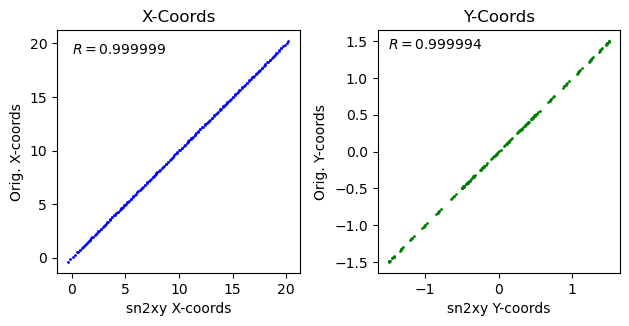

In [54]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(xyOut['xout'],data_pts['X'],s=1,c='b')
ax1.axis('square')
ax1.text(0,19,r'$R = %0.6f$'%xcorr)
ax1.set_xlabel("sn2xy X-coords")
ax1.set_ylabel("Orig. X-coords")
ax1.set_title("X-Coords")

ax2.scatter(xyOut['yout'],data_pts['Y'],s=1,c='g')
ax2.axis('square')
ax2.text(-1.50,1.4,r'$R = %0.6f$'%ycorr)
ax2.set_xlabel("sn2xy Y-coords")
ax2.set_ylabel("Orig. Y-coords")
ax2.set_title("Y-Coords")

fig.tight_layout()



Text(0.5, 1.0, 'Y-Coord Error')

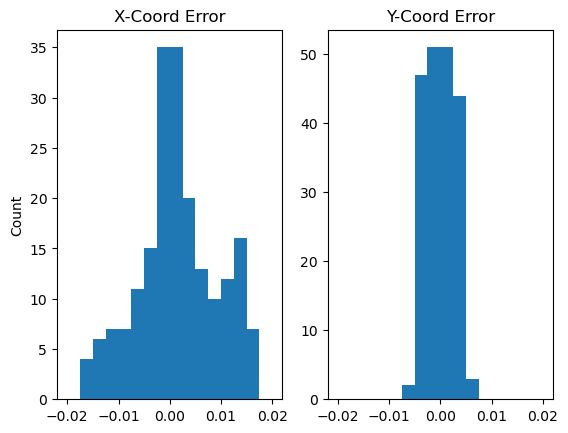

In [55]:
fig2, (ax3,ax4) = plt.subplots(1,2)

bins = np.arange(-0.02,0.021,0.0025)
ax3.hist(xyOut['x_diff'],bins)
ax3.set_title("X-Coord Error")
ax3.set_ylabel("Count")
ax4.hist(xyOut['y_diff'],bins)
ax4.set_title("Y-Coord Error")